**Part 1: Uniform Distribution**

In this problem, we will generate random numbers from a simple homogeneous distribution, and study how fast a series of random numbers converge to the distribution they are drawn from.

(a) Using a uniform distribution between 0 and 1, generate arrays of 1000,10000, and 100000 random numbers (samples)

(b) For each array, plot the results as histograms with 100 bins of equal size, including estimated uncertainties on the number of samples within each bin

(c) For each array, fit a straight line through the binned data, and estimate uncertainties on the slope and intercept of that line (i.e. the uncertainty on the parameters $m$ and $b$ in the function $f=mx+b$). Use the curve_fit function from scipy to do this.

[18.86778751  5.40579412]


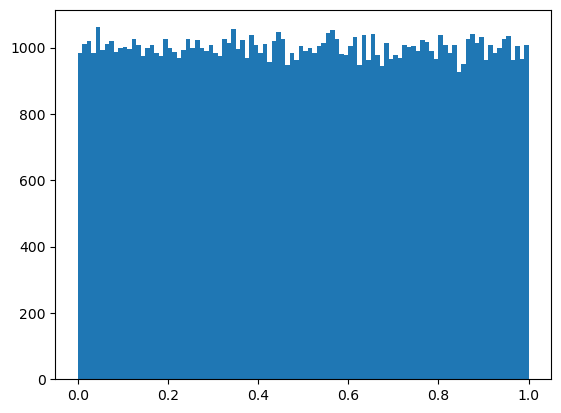

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline 

def samplegen(N):
    tot = N
    Sample = np.random.rand(N)
    n,bins,patch = plt.hist(x=Sample, bins=100, range=(0,1))
    bins = 0.5*(bins[:-1] + bins[:1])
    def func(x,a,b):
        return a*x+b
    popt, pcov = sp.optimize.curve_fit(f=func,xdata=bins,ydata=n)
    perr = np.sqrt(np.diag(pcov))
    print(perr)
    return n, tot

n,tot = samplegen(100000)

If a histogram built using $N$ samples has 100 bins with $N_i$ samples in each bin, the estimated statistical error on the number of samples in bin $i$ is $\sqrt{N_i}$. The average number of samples that we would expect in each bin, on the other hand, is $N/100$. For each value of $N$ and each bin $i$, calculate

$E_i = \frac{N_i - (N/100)}{\sqrt{N_i}}$

For each $N$, build a histogram for the 100 values of $E_i$ calculated in that manner (use 20 bins in $[-5,5]$). How do you interpret your results?

[-0.51006137  0.37721677  0.65721342 -0.51006137  1.87271696 -0.22213829
  0.37721677  0.59520492 -0.44585083  0.          0.0631824  -0.15851066
  0.78086881  0.22058872 -0.83309374 -0.0316386   0.22058872 -0.51006137
 -0.86558026  0.78086881  0.         -0.47793974 -0.99586348 -0.19030844
  0.84251675 -0.0316386   0.75       -0.0316386  -0.31782086  0.28333285
 -0.54221579 -0.83309374  0.84251675  0.40844975  1.72328087 -0.15851066
  0.68817237 -1.06120846  1.17946462  0.25197632 -0.57440308  0.31465839
 -1.3899926   0.59520492  1.48272495  0.8117077  -1.75569144 -0.51006137
 -1.19230834  0.18917    -0.28589442 -0.06330889 -0.57440308  0.15772007
  0.47082362  1.39204851  1.60322868  0.84251675 -0.60662331 -0.73583519
  0.12623888  0.99611649 -1.68888149  1.20992049 -1.22516917  1.24034735
 -0.73583519 -1.78915013  0.43965201 -1.12668986 -0.76822128 -0.99586348
  0.22058872  0.03160698  0.18917    -0.38177086  0.71910121  0.53307516
 -0.34977965 -1.09393207  1.17946462  0.22058872 -0

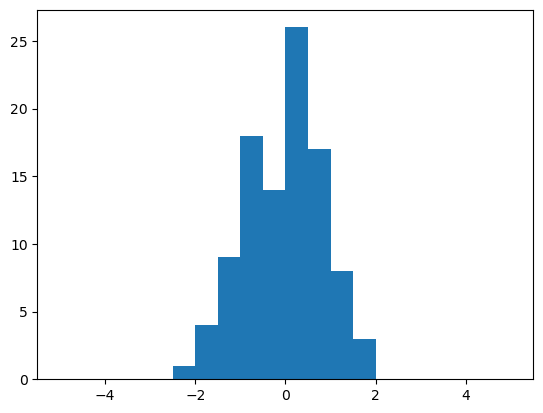

In [3]:
E = (n - tot/100)/np.sqrt(n)
print(E)

n2, bins, patch = plt.hist(x = E, bins = 20, range = (-5,5))
#The plot here is roughly gaussian, which is to be expect as a result of the central limit theorem.


**Part 2: A simple radiation transport code**

Consider a massless particle moving at the speed of light through a scattering medium in which its mean free path is $\lambda$. In that medium, we can find the time $\Delta t$ to the next scattering event by drawing a number $r$ from a uniform distribution in $(0,1]$, and choosing $\Delta t = -\frac{\lambda}{c} \ln(r)$.

Let's work in two dimension and assume that the scattering medium is a circle of radius $R$, and that each scattering event changes the direction of motion of the particle to a new random direction (i.e. the particles random walks through the medium). 

(a) Write a function that propagates a particle from the center of the circle to its edge, and returns the time that it took for the particle to reach that edge. For concretenees, use $R=10\,{\rm cm}$ and $\lambda=1\,{\rm cm}$.

(b) Run that function $10,000$ times, and use your results to plot an estimate of the distribution $f(t_{\rm escape})$ for the time $t_{\rm escape}$ required for a particle to escape the scattering region. 

(c) Compare the average time needed to escape to the time needed for a photon to move a distance $R$ in vacuum.

In [6]:
def radtransport(R,l):
    c = 2.998 * 10**10
    posvec = [0,0]
    tnet = 0
    pos = 0
    while pos < 10:
        r = np.random.rand(1)
        theta = np.random.rand(1)*2*np.pi
        t = -(l/c)*np.log(r)
        tnet = tnet + t
        dx = np.cos(theta)*c*t
        dy = np.sin(theta)*c*t
        posvec[0] = posvec[0] + dx
        posvec[1] = posvec[1] + dy
        pos = np.sqrt(posvec[1]**2 + posvec[0]**2)
    return tnet

C:\Users\cswoo\AppData\Local\Temp\ipykernel_4756\3799982662.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data[i] = radtransport(10,1)


1.9702595849196993e-09
1.35918848951965e-09
3.3333333333333337e-10


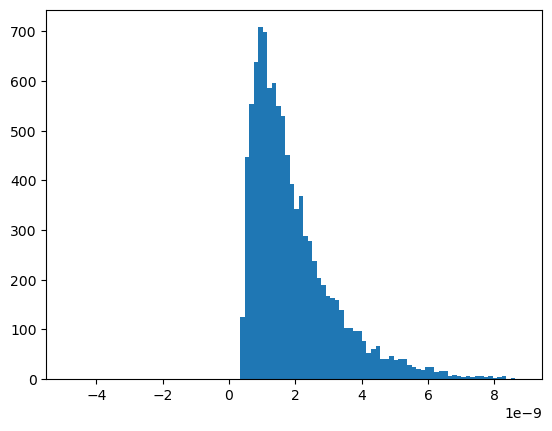

In [7]:
i = 0
data = np.zeros(10000)
while i<10000:
    data[i] = radtransport(10,1)
    i = i+1
mean = np.mean(data)
stdev = np.std(data)
n,bins,patch = plt.hist(x = data, bins = 100, range = ((mean-5*stdev),(mean+5*stdev)))
print(mean)
print(stdev)

cR = 0.1/(3*10**8)
print(cR)
# where cR is the time it would take a photon traveling in a straight line to travel 10 cm

**Part 3: Monte-Carlo model for particle interactions**

In this problem, we will code a Monte-Carlo simulation of a relatively simple interaction: Thomson scattering.

Consider Thomson scattering of a photon by $N$ charged particles (*target*) of mass $m$ and charge $q$. The probability that the photon will be scattered by an angle between $\theta$ and $\theta+d\theta$ is

$\frac{df}{d\cos\theta} = \frac{N}{A} \left(\frac{q^2}{4\pi \epsilon_0 mc^2}\right)^2\pi \left(1+\cos^2{\theta}\right)$

with $\epsilon_0=8.85\,10^{-12} \,{\rm F/m}$ (SI units) the permittivity of vacuum, $c=3\,10^8\,{\rm m/s}$  the speed of light, and $A$ the area of the target as seen by the photons.

Consider a beam of photon incident on a container including $N_e/A=10^{28}\,{\rm m^{-2}}$ electrons per square meter of target area (and as many protons, but you can see from the scaling of $df/d\cos\theta$ with $m$ that electrons will be the main source of scattering). Then

$\frac{df}{d\cos\theta} = \frac{N_e}{A} \left(\frac{e^2}{4\pi \epsilon_0 m_ec^2}\right)^2\pi \left(1+\cos^2{\theta}\right)$

with $e=1.6\,10^{-19}\,{\rm C}$ and $m_e = 9.1\,10^{-31}\,{\rm kg}$.

(a) Calculate the probability

$p_{\rm sc} = \int_{-1}^1 d\cos\theta  \frac{df}{d\cos\theta} = \int_{-1}^1 d\mu \frac{df}{d\mu}$

that a photon is scattered by an electron in this system (using $\mu=\cos\theta$ as integration variable is easier than using $\theta$ here).

(b) Now, randomly draw the outcome of 10,000 photons reaching our target. Each photon has a probability $(1-p_{\rm sc})$ of passing through the target without scattering, and a probability $p_{\rm sc}$ to be scattered. If scattered, the probability distribution of $\cos\theta$ is $\frac{df}{d\cos\theta}$. 

(c) Plot your result as a histogram showing the number of scattered photons as a function of $\cos\theta$. How well does your result match the analytical distribution? Note that when you compare the number of photons in a bin to the analytical predictions, you need to (at least approximately) integrate that prediction over the width of the bin.

In [11]:
#Part a)
NeA = 10**28
eo = 8.85*10**-12
c = 3*10**8
me = 9.11*10**-31
e = 1.6*10**-19

def dfdcos(x):
    return NeA*(e**2/(4*np.pi*eo*me*c**2))**2*np.pi*(1+x**2)

X = np.linspace(-1,1,10000)
Y = dfdcos(X)

def myint(X,Y):
    h = X[1]-X[0]
    I = sp.integrate.cumtrapz(Y,X)
    return I

psc = myint(X,Y)
zero = [0]
psc = np.concatenate((zero,psc))
print(psc[-1])

0.6603443943834548


C:\Users\cswoo\AppData\Local\Temp\ipykernel_4756\1018978060.py:16: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  I = sp.integrate.cumtrapz(Y,X)


C:\Users\cswoo\AppData\Local\Temp\ipykernel_4756\547204734.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scatterdata[i] = cumulativedist(prob)


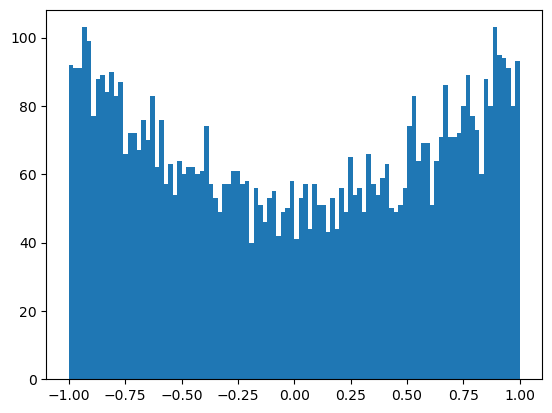

In [12]:
#Part b)
cumulativedist = sp.interpolate.interp1d(psc,X)
def scatterfunc(N):
    scatterdata = np.zeros(N)
    i = 0
    while i<N:
        prob = np.random.rand(1)
        if prob <= psc[-1]:
            scatterdata[i] = cumulativedist(prob)
            
        else:
            scatterdata[i] = -2
        i = i+1
        
    scatterdata = [i for i in scatterdata if i>-2]
    Smean = np.mean(scatterdata)
    Sstdev = np.std(scatterdata)

    n,bins,patch = plt.hist(x = scatterdata, bins = 100, range = ((-1),(1)))

scatterfunc(10000)

**Part 4: Recovering model parameters using data fitting**

(a) Let's assume that we have the results from (3b), but did not know what $N_e/A$ was. Fit your data from (3b) to the theoretical model for $df/d(\cos\theta)$, treating $N_e/A$ as a free parameter of the fit. What are the best-fit $N_e/A$ and the uncertainty on that best fit value? Note that the curve_fit method needs a reasonable initial guess for $N_e/A$, and the default initial guess is 1. This will not work. Set an initial guess within an order of magnitude of the correct value so that curve_fit finds a solution.

(b) Our first example was fairly simple, and could have been solved without any fitting (as our analytical function was linear in $N_e/A$. For a more complicated system, let us consider the observation of photons from line emission, in the presence of a non-zero background. We assume that the total number of photons $dN$ observed over a small energy interval $dE$ is modeled as

$\frac{dN}{dE} = A E^{-2} + \frac{B}{1+\left(\frac{2(E-E_0)}{w}\right)^2}$

for some unknown parameters $A$ (amplitude of the background), $B$ (amplitude of the signal), $E_0$ (central energy of the line) and $w$ (width of the line). Used the attached data set showing the number of photons measured in different energy bins to estimate the parameters of the model $(A,B,E_0,w)$, with error bars.

In [16]:
# Part A
guess = 2*10**28
constants = (e**2/(4*np.pi*eo*me*c**2)**2)

def guessfit(x):
             return guess*constants*(1-x**2)

#Im fitting to the bins and the number of samples in each bin
binsc = (bins[:-1] + bins[0:-1])*0.5
popt = sp.optimize.curve_fit(f = guessfit, xdata = n, ydata = binsc)
return popt

ValueError: Unable to determine number of fit parameters.